## part - 1
- data loading

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
import pandas as pd

In [ ]:
od.download('stackoverflow-developer-survey-2020')

Using downloaded and verified file: ./stackoverflow-developer-survey-2020/survey_results_public.csv
Using downloaded and verified file: ./stackoverflow-developer-survey-2020/survey_results_schema.csv
Using downloaded and verified file: ./stackoverflow-developer-survey-2020/README.txt


In [ ]:
survey_data_df = pd.read_csv('/content/stackoverflow-developer-survey-2020/survey_results_public.csv')

In [ ]:
survey_qtext = pd.read_csv('/content/stackoverflow-developer-survey-2020/survey_results_schema.csv',index_col='Column').QuestionText

## Part - 2
- data preprocessing and cleaning

In [ ]:

import numpy as np

In [ ]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [ ]:
survey_df = survey_data_df[selected_columns].copy()
schema = survey_qtext[selected_columns]

In [ ]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode,errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode,errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro,errors='coerce')

In [ ]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


In [ ]:
survey_df.drop(survey_df[survey_df.Age<10].index,inplace=True)
survey_df.drop(survey_df[survey_df.Age>100].index,inplace=True)
survey_df.drop(survey_df[survey_df.WorkWeekHrs>140].index,inplace=True)

In [ ]:
survey_df['Gender'].value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [ ]:
survey_df.where(~(survey_df.Gender.str.contains(';',na=False)),np.nan,inplace=True)

In [ ]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
5037,United States,42.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","A natural science (such as biology, chemistry,...",Yes,22.0,20.0,17.0,C;C++;HTML/CSS;JavaScript;Python;R,C;C++;HTML/CSS;JavaScript;Python,Once every few years,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,Academic researcher;Data scientist or machine ...,50.0,Very satisfied,Industry that I’d be working in;Flex time or a...,Often: 1-2 days per week or more,Fairly important
23522,Germany,37.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,12.0,15.0,8.0,Bash/Shell/PowerShell;JavaScript;Python;Rust,Bash/Shell/PowerShell;Python;Rust,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed part-time,"Developer, back-end;Scientist",16.0,Neither satisfied nor dissatisfied,"Languages, frameworks, and other technologies ...",Occasionally: 1-2 days per quarter but less th...,Somewhat important
34745,Russian Federation,38.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Information systems, information technology, o...",Yes,13.0,30.0,15.0,Bash/Shell/PowerShell;Go;PHP;Python;Rust,Rust;Scala,Once every few years,Meditate;Call a coworker or friend;Visit Stack...,Employed full-time,"Developer, back-end;DevOps specialist;Engineer...",40.0,Slightly satisfied,"Flex time or a flexible schedule;Languages, fr...",Sometimes: 1-2 days per month but less than we...,Fairly important
50485,Croatia,16.0,Man,Primary/elementary school,NaN,Yes,7.0,5.0,NaN,Bash/Shell/PowerShell;C;HTML/CSS;JavaScript;Py...,Bash/Shell/PowerShell;C++;Go;TypeScript,Every few months,Visit Stack Overflow,"Not employed, and not looking for work",NaN,NaN,NaN,NaN,NaN,Not at all important/not necessary
51484,India,35.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Another engineering discipline (such as civil,...",No,18.0,17.0,13.0,Java;SQL,Java;Kotlin;SQL,Once a year,Visit Stack Overflow;Watch help / tutorial vid...,Employed full-time,"Developer, back-end",40.0,Slightly satisfied,Industry that I’d be working in;Flex time or a...,Never,Somewhat important
3563,Czech Republic,29.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,10.0,15.0,7.0,C;Java;Kotlin;PHP;SQL;TypeScript,Go;Java;Kotlin;Swift,Every few months,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, back-end;Developer, desktop or ente...",40.0,Very dissatisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
2649,Canada,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","A humanities discipline (such as literature, h...",Yes,29.0,2.0,1.0,C#;HTML/CSS;JavaScript;SQL,Bash/Shell/PowerShell;Python;Ruby,Once every few years,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",35.0,Slightly satisfied,Remote work options;Office environment or comp...,Sometimes: 1-2 days per month but less than we...,Fairly important
19536,United States,32.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16.0,16.0,10.0,HTML/CSS;JavaScript;PHP;SQL,HTML/CSS;JavaScript;PHP;SQL,Once a year,Meditate;Call a coworker or friend;Visit Stack...,Employed full-time,Academic researcher;Database administrator;Dev...,43.0,Neither satisfied nor dissatisfied,How widely used or impactful my work output wo...,Sometimes: 1-2 days per month but less than we...,Critically important
10636,South Africa,32.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Mathematics or statistics,Yes,20.0,8.0,NaN,Assembly;C++;HTML/CSS;JavaScript;Python;SQL;VBA,Assembly;Bash/Shell/PowerShell;Go;HTML/CSS;Jav...,Eve

## Part - 3
- Analysis & Visulization

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Country

In [ ]:
survey_df.Country.nunique()

183

In [ ]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: Country, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


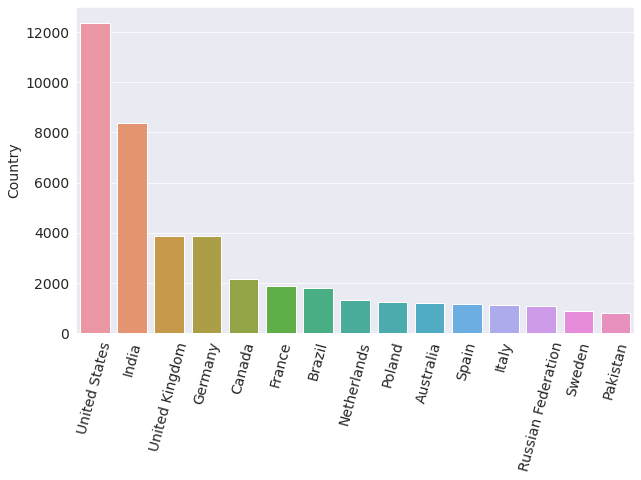

In [ ]:
plt.xticks(rotation=75)
sns.barplot(top_countries.index,top_countries);

### age

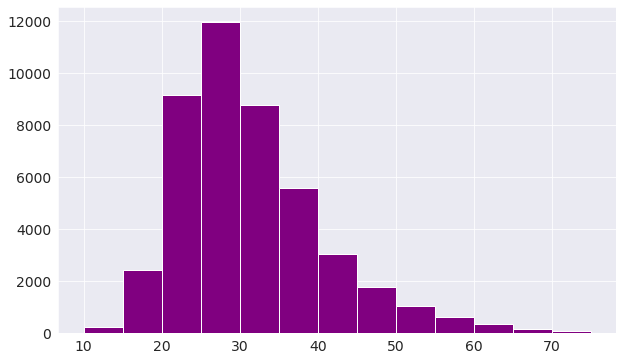

In [ ]:
plt.hist(survey_df.Age,bins=np.arange(10,80,5),color='purple');

### gender

In [ ]:
# gender_counts = survey_df.Gender.value_counts(dropna=False)
gender_counts = survey_df.Gender.value_counts()
gender_counts

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

([<matplotlib.patches.Wedge at 0x7f2aef98aed0>,
 [Text(1.0617335815722195, -0.28761398047005127, 'Man'),
  Text(-1.0544835403587842, 0.3131524598536697, 'Woman'),
  Text(-1.0996796455244597, 0.026545757084685317, 'Non-binary, genderqueer, or gender non-conforming')],
 [Text(0.5791274081303015, -0.1568803529836643, '91.6%'),
  Text(-0.5751728401957005, 0.17081043264745616, '7.7%'),
  Text(-0.5998252611951598, 0.014479503864373808, '0.8%')])

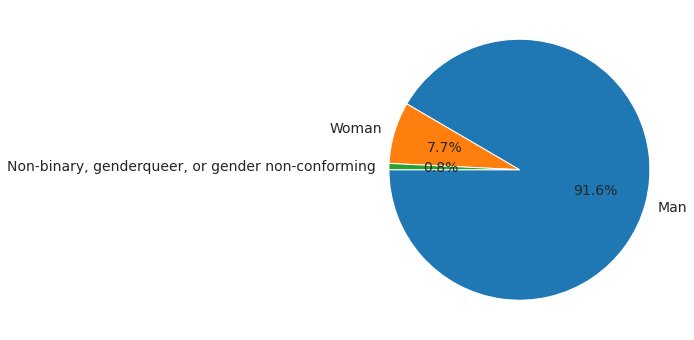

In [ ]:
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%',startangle=180)

### education level

'for percentage'

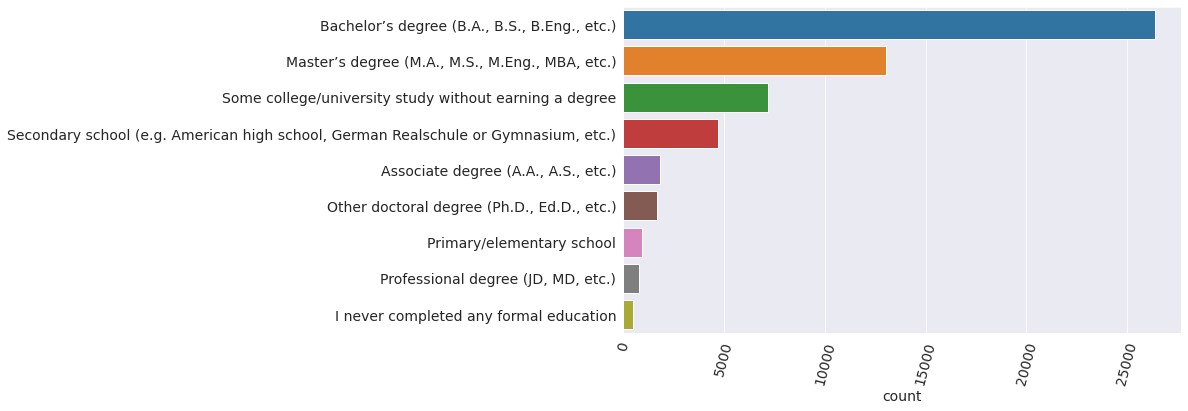

In [ ]:
sns.countplot(y=survey_df.EdLevel,order=survey_df.EdLevel.value_counts().index)
plt.xticks(rotation=75);
plt.ylabel(None);
'''for percentage'''
# ax = sns.countplot(y=survey_df.EdLevel,order=survey_df.EdLevel.value_counts().index)
# total = len(survey_df['EdLevel'])
# for p in ax.patches:
#     ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_y()+0.1, p.get_height()+5))
#     _ = ax.set_xticklabels(map('{:.1f}%'.format, 100*ax.xaxis.get_majorticklocs()/total))
# plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'percent')

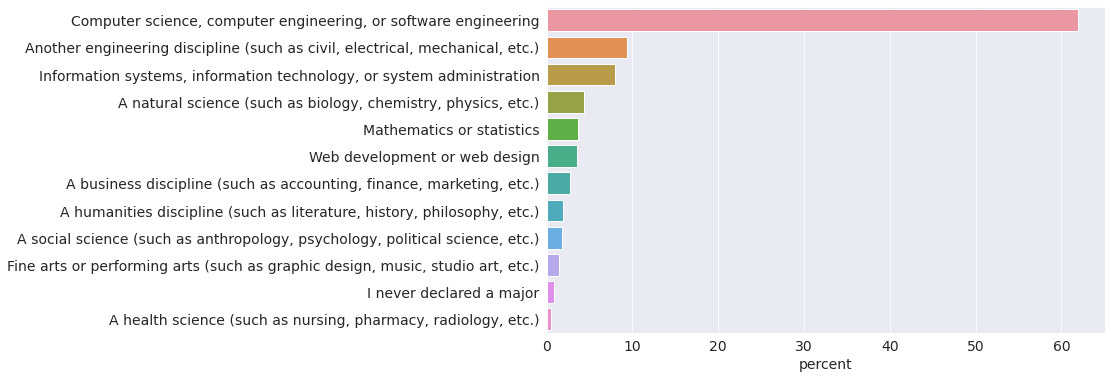

In [ ]:
undergrad_pct = survey_df.UndergradMajor.value_counts()*100/survey_df.UndergradMajor.count()

sns.barplot(undergrad_pct,undergrad_pct.index);
plt.xlabel('percent')

### employment

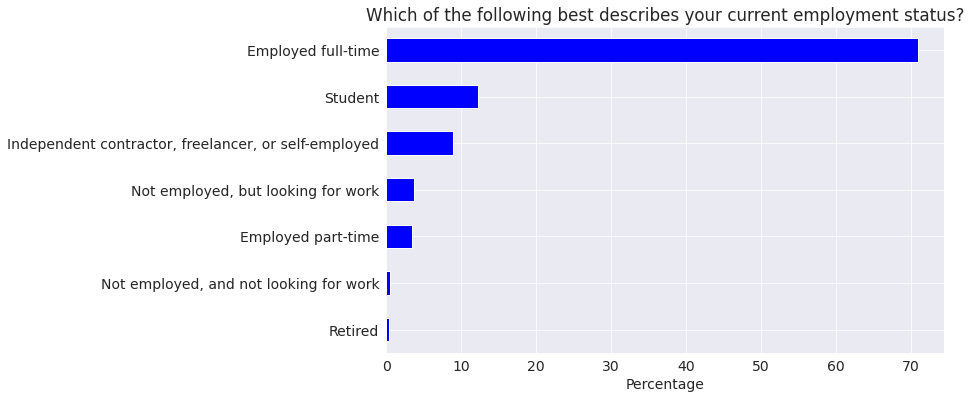

In [ ]:
(survey_df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='b')
plt.title(schema.Employment)
plt.xlabel('Percentage');

In [ ]:
survey_df.DevType.to_frame()

,DevType
0,"Developer, desktop or enterprise applications;..."
1,"Developer, full-stack;Developer, mobile"
2,NaN
3,NaN
4,NaN
...,...
64456,Senior executive/VP
64457,NaN
64458,NaN
64459,NaN


In [ ]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [ ]:
dev_type_df = split_multicolumn(survey_df.DevType)

In [ ]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

Developer, back-end                              26996
Developer, full-stack                            26915
Developer, front-end                             18128
Developer, desktop or enterprise applications    11687
Developer, mobile                                 9406
DevOps specialist                                 5915
Database administrator                            5658
Designer                                          5262
System administrator                              5185
Developer, embedded applications or devices       4701
Data or business analyst                          3970
Data scientist or machine learning specialist     3939
Developer, QA or test                             3893
Engineer, data                                    3700
Academic researcher                               3502
Educator                                          2895
Developer, game or graphics                       2751
Engineering manager                               2699
Product ma

## Part - 4
- Ques and Ans

Q1: Most popular Programming languages 
- now = LanguageWorkedWith
- next = LanguageDesireNextYear

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


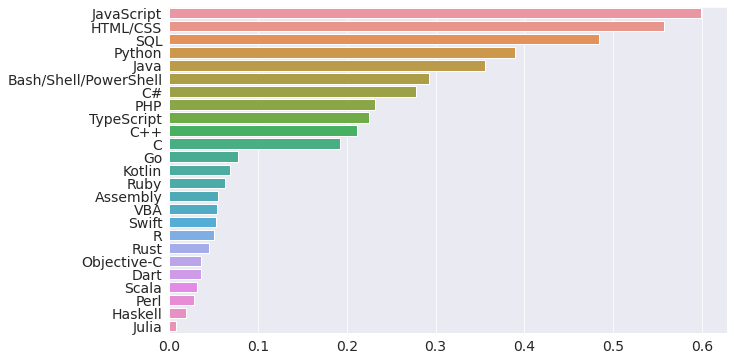

In [ ]:
language_df = split_multicolumn(survey_df.LanguageWorkedWith)
popular_language = language_df.mean().sort_values(ascending=False)
sns.barplot(popular_language, popular_language.index)

Q2: language loves now and next

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


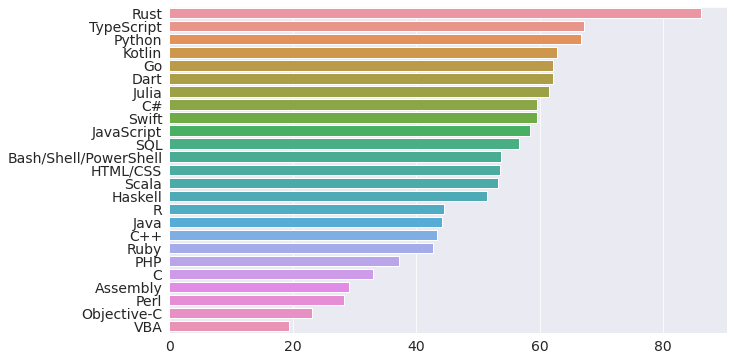

In [ ]:
lan_worked_df = split_multicolumn(survey_df.LanguageWorkedWith)
lan_interest_df = split_multicolumn(survey_df.LanguageDesireNextYear)
lan_love_df = lan_worked_df & lan_interest_df
lan_love_pct = (lan_love_df.sum()*100/lan_worked_df.sum()).sort_values(ascending=False)
sns.barplot(lan_love_pct, lan_love_pct.index)

Q3: Highest work hour countries per week

In [ ]:
countries_df = survey_df.groupby('Country')[['WorkWeekHrs','Age']].mean().sort_values('WorkWeekHrs', ascending=False)
high_response_countries_df = countries_df.loc[survey_df.Country.value_counts() > 250].head(15)
high_response_countries_df

,WorkWeekHrs,Age
Country,,
Iran,44.337748,27.521490
Israel,43.915094,32.605649
China,42.150000,26.988636
United States,41.802982,33.722058
Greece,41.402724,31.725490
Viet Nam,41.391667,25.786585
South Africa,41.023460,32.127027
Turkey,40.982143,29.522772
Sri Lanka,40.612245,26.965714


In [ ]:
survey_df.Country.value_counts() 

United States     12371
India              8364
United Kingdom     3881
Germany            3864
Canada             2175
                  ...  
Lesotho               1
Gabon                 1
North Korea           1
Chad                  1
Saint Lucia           1
Name: Country, Length: 183, dtype: int64

Q4: Age to build career in programming

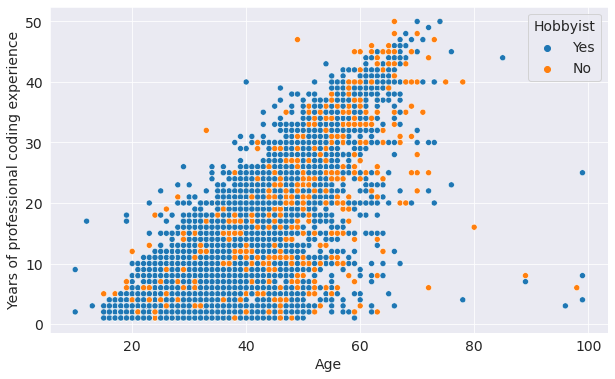

In [ ]:
sns.scatterplot(x='Age', y='YearsCodePro', hue='Hobbyist', data=survey_df)
plt.xlabel("Age")
plt.ylabel("Years of professional coding experience");

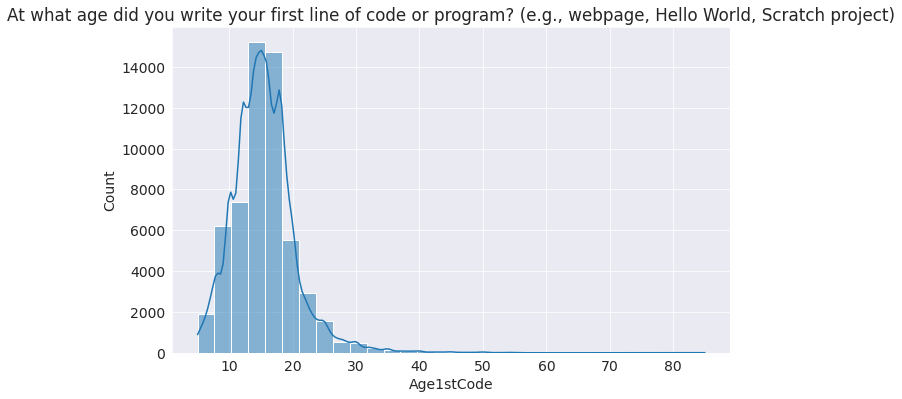

In [ ]:
plt.title(schema.Age1stCode)
sns.histplot(x=survey_df.Age1stCode, bins=30, kde=True);

## Inferences and Conclusions

We've drawn many inferences from the survey. Here's a summary of a few of them:

- Based on the survey respondents' demographics, we can infer that the survey is somewhat representative of the overall programming community. However, it has fewer responses from programmers in non-English-speaking countries and women & non-binary genders.

- The programming community is not as diverse as it can be. Although things are improving, we should make more efforts to support & encourage underrepresented communities, whether in terms of age, country, race, gender, or otherwise.


- Although most programmers hold a college degree, a reasonably large percentage did not have computer science as their college major. Hence, a computer science degree isn't compulsory for learning to code or building a career in programming.

- A significant percentage of programmers either work part-time or as freelancers, which can be a great way to break into the field, especially when you're just getting started.

- Javascript & HTML/CSS are the most used programming languages in 2020, closely followed by SQL & Python.

- Python is the language most people are interested in learning - since it is an easy-to-learn general-purpose programming language well suited for various domains.

- Rust and TypeScript are the most "loved" languages in 2020, both of which have small but fast-growing communities. Python is a close third, despite already being a widely used language.

- Programmers worldwide seem to be working for around 40 hours a week on average, with slight variations by country.

- You can learn and start programming professionally at any age. You're likely to have a long and fulfilling career if you also enjoy programming as a hobby.